In [1]:
from matplotlib import pyplot as plt
from display import display_structure
import numpy as np

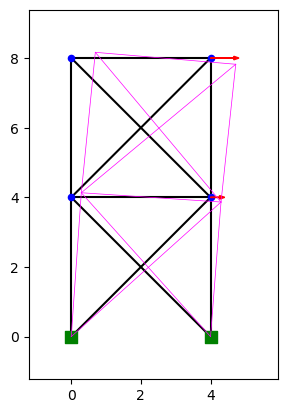

In [2]:
from MLP.structural.structure import SeismicStoriesTruss, StoriesTruss

params = {
    'n_stories': 2,
    'n_spans': 1,
    'height': 4.0,
    'width': 4.0,
}

for i in range(params['n_stories'] * (params['n_spans'] * 4 + 1)):
    params[f"A_{i}"] = .01
    params[f"E_{i}"] = 35.e9

params["P"] = 1000e3

# for i, j in enumerate(range((params['n_stories'] + 1) * params['n_spans'],
#                             (params['n_stories'] + 1) * (params['n_spans'] + 1))):
#     params[f"P_x_{j}"] = (1000e3 / (params['n_stories'] + 1)) * i

from MLP.structural.analysis import LinearAnalysis

struct = SeismicStoriesTruss()
struct.generate_model(params)
LinearAnalysis().run_analysis()

display_structure(def_scale=10)

In [3]:
from MLP.dataset.generator import SeismicTwoStoriesTrussGenerator

g = SeismicTwoStoriesTrussGenerator("data/config/cantilever_concrete.yaml")


def delta(E, H, W, P, h):
    f = (np.pow(H / W, -3.25) + 5)
    return f * 37 / 12 * P * H ** 3 / (E * (3 * W ** 2 * h ** 2 + h ** 4))


ratio = dict()
default_config = g.default_config
default_config['__young__'] = {'distribution': 'constant', 'value': 50.e9}
default_config['width'] = {'distribution': 'constant', 'value': 4}
default_config['height'] = {'distribution': 'constant', 'value': 4}
default_config['P'] = {'distribution': 'constant', 'value': 1000e3}

results = [r for r in g.__iter__(default_config, 1)][0]

u_exp = delta(50e9, 4, 4, 1000e3, .1)
u_real = results['nodes_displacement'].max()
r = u_real / u_exp

print()
print(f"Expected delta = {u_exp * 100:.2f} cm")
print(f"Actual delta = {u_real * 100:.2f} cm")
print(f"Ratio: {u_exp / u_real:.3f}")


Expected delta = 4.93 cm
Actual delta = 5.07 cm
Ratio: 0.974


In [10]:
g.save_from_iterator(results, directory="./data/dataset/seismic_test", max_size=len(results))

Dataset saved to data/dataset/seismic_test/data.hdf5


## Cantilever

In [11]:
from MLP.dataset.generator import TenBarsCantileverTrussGenerator
from MLP.dataset import TenBarsCantileverTrussDataset

g = TenBarsCantileverTrussGenerator("data/config/cantilever_concrete.yaml")

default_config = g.default_config

default_config['__area__'] = {'distribution': 'constant', 'value': 0.012}
default_config['__young__'] = {'distribution': 'constant', 'value': 35.0e9}
default_config['length'] = {'distribution': 'constant', 'value': 6.}
default_config['height'] = {'distribution': 'constant', 'value': 6.}
default_config['P_y_4']['shared_with'] = 'load'
default_config['P_y_5']['shared_with'] = 'load'
default_config['load'] = {'distribution': 'constant', 'value': 100.0e3}

configs = []
for q in np.arange(0, 501.e3, 1.e3):
    config = default_config.copy()
    config['load'] = {'distribution': 'constant', 'value': q}
    configs.append(config)

results = []
for config in configs:
    results.append(g.__iter__(config, 1).__next__())

In [ ]:
# Adding noise
for result in results:
    e = np.random.normal(1, 0.0025, size=result["nodes_displacement"].shape)
    result["nodes_displacement"] *= e

    e = np.random.normal(1, 0.0025, size=result["bars_elongation"].shape)
    result["bars_elongation"] *= e
    result["bars_strain"] = result["bars_elongation"] / result["bars_length_init"]

    e = np.random.normal(1, 0.0025, size=result["bars_force"].shape)
    result["bars_force"] *= e

g.save_from_iterator(results, directory="./data/dataset/real_cantilever_test", max_size=len(results))

In [2]:
from dataset.generator import TenBarsCantileverTrussGenerator

Dataset saved to data/dataset/test/data.hdf5


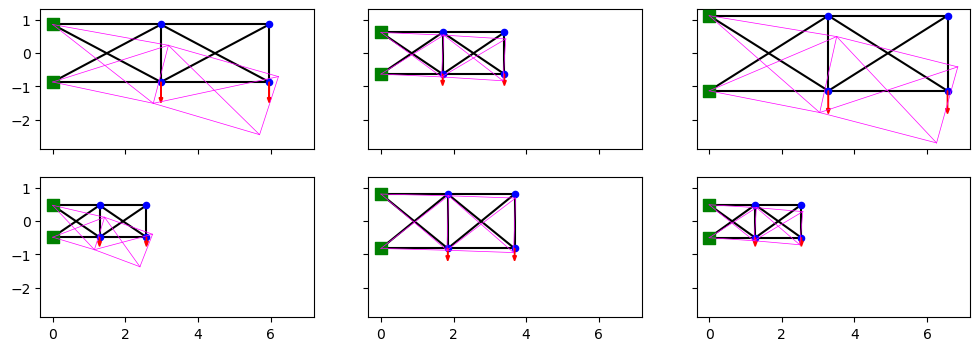

In [3]:
g = TenBarsCantileverTrussGenerator("data/config/cantilever_concrete.yaml")

fig, axs = plt.subplots(2, 3, figsize=(12, 4), sharex=True, sharey=True)
for i, r in enumerate(g):
    display_structure(ax=axs[i // 3, i % 3], def_scale=20)
    if i >= 5: break

g.save("data/dataset/cantilever", append=False)

KeyboardInterrupt: 

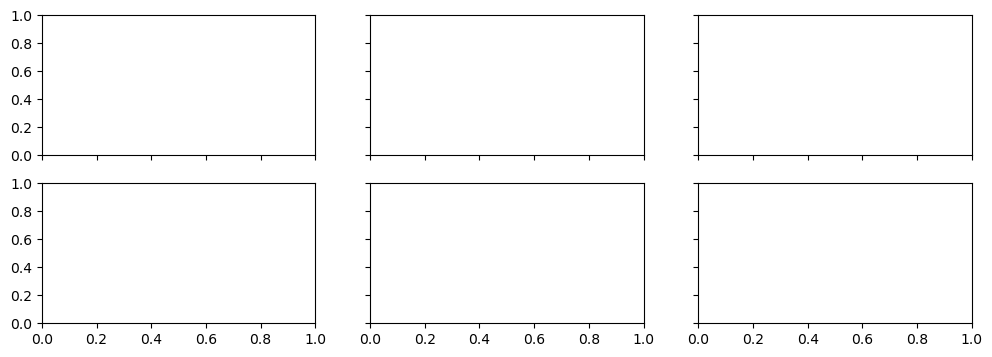

In [10]:
g = TenBarsCantileverTrussGenerator("data/config/cantilever_aluminum.yaml")

fig, axs = plt.subplots(2, 3, figsize=(12, 4), sharex=True, sharey=True)
for i, r in enumerate(g):
    display_structure(ax=axs[i // 3, i % 3], def_scale=20)
    if i >= 5: break

g.save("data/dataset/cantilever", append=True)

KeyboardInterrupt: 

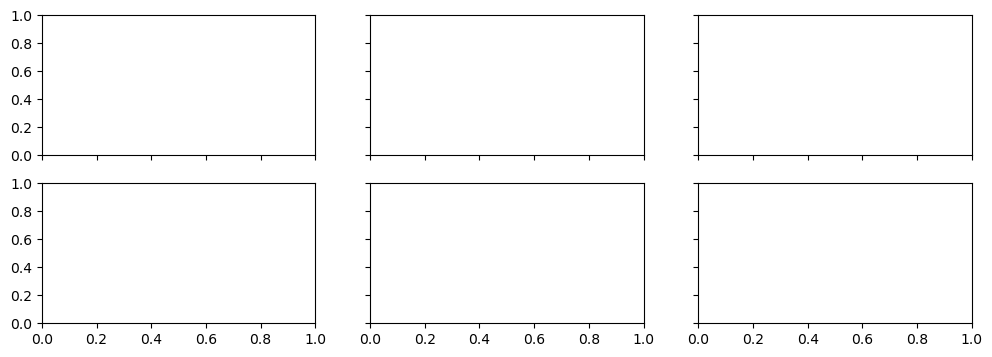

In [11]:
g = TenBarsCantileverTrussGenerator("data/config/cantilever_steel.yaml")

fig, axs = plt.subplots(2, 3, figsize=(12, 4), sharex=True, sharey=True)
for i, r in enumerate(g):
    display_structure(ax=axs[i // 3, i % 3], def_scale=20)
    if i >= 5: break

g.save("data/dataset/cantilever", append=True)

## Beam

In [12]:
from dataset.generator import BiSupportedTrussBeamGenerator

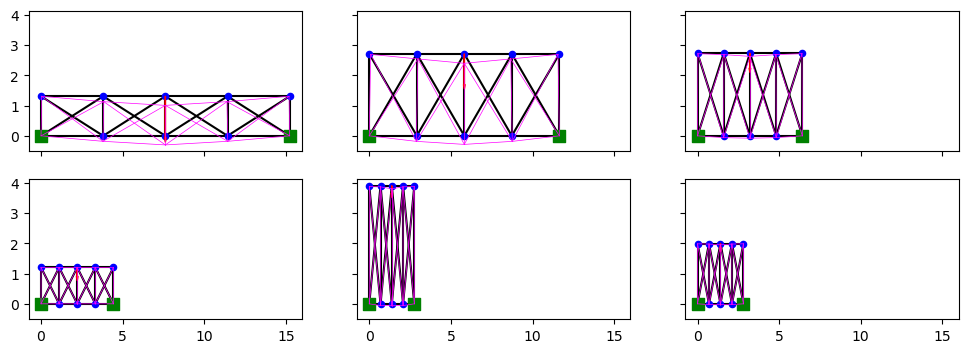

In [13]:
g = BiSupportedTrussBeamGenerator("data/config/beam_concrete.yaml")

fig, axs = plt.subplots(2, 3, figsize=(12, 4), sharex=True, sharey=True)
for i, r in enumerate(g):
    display_structure(ax=axs[i // 3, i % 3], def_scale=20)
    if i >= 5: break

g.save("data/dataset/beam", append=False)

Dataset saved to data/dataset/beam/data.hdf5


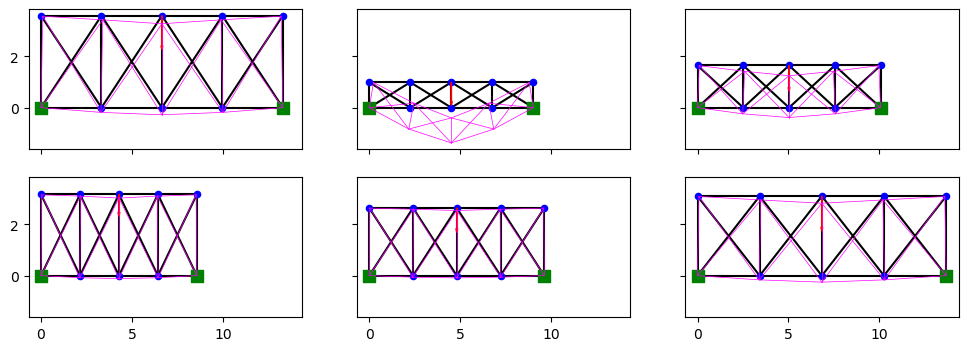

In [8]:
g = BiSupportedTrussBeamGenerator("data/config/beam_aluminum.yaml")

fig, axs = plt.subplots(2, 3, figsize=(12, 4), sharex=True, sharey=True)
for i, r in enumerate(g):
    display_structure(ax=axs[i // 3, i % 3], def_scale=20)
    if i >= 5: break

g.save("data/dataset/beam", append=True)

Dataset saved to data/dataset/beam/data.hdf5


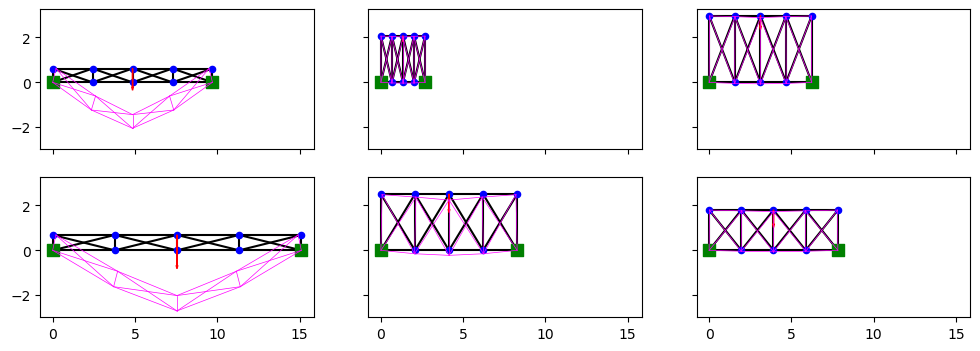

In [9]:
g = BiSupportedTrussBeamGenerator("data/config/beam_steel.yaml")

fig, axs = plt.subplots(2, 3, figsize=(12, 4), sharex=True, sharey=True)
for i, r in enumerate(g):
    display_structure(ax=axs[i // 3, i % 3], def_scale=20)
    if i >= 5: break

g.save("data/dataset/beam", append=True)

## Triangle

In [18]:
from dataset.generator import TwoBarsTrussGenerator

In [22]:
print(g._TwoBarsTrussGenerator__structure.supports.__repr__())
print(g._TwoBarsTrussGenerator__structure.elements_connectivity.__repr__())

[[0, True, True], [1, False, False], [2, True, True]]
array([[0, 1],
       [1, 2]])


In [21]:
g._TwoBarsTrussGenerator__structure.__dir__()

['__module__',
 'generate_structure',
 '__doc__',
 '__abstractmethods__',
 '_abc_impl',
 'n_dof',
 'n_dim',
 '_get_r',
 '_compute_k_loc',
 'compute_k_loc',
 'compute_k_global',
 '_AbstractStructure__elements_length',
 'initial_elements_length',
 'deformed_elements_length',
 'supports',
 'n_nodes',
 'n_elements',
 'nodes_coordinates',
 'nodes_displacements',
 'elements_connectivity',
 'elements_forces',
 'loads',
 'stiffness_matrix',
 'generate_model',
 '__dict__',
 '__weakref__',
 '__slots__',
 '__new__',
 '__repr__',
 '__hash__',
 '__str__',
 '__getattribute__',
 '__setattr__',
 '__delattr__',
 '__lt__',
 '__le__',
 '__eq__',
 '__ne__',
 '__gt__',
 '__ge__',
 '__init__',
 '__reduce_ex__',
 '__reduce__',
 '__getstate__',
 '__subclasshook__',
 '__init_subclass__',
 '__format__',
 '__sizeof__',
 '__dir__',
 '__class__']

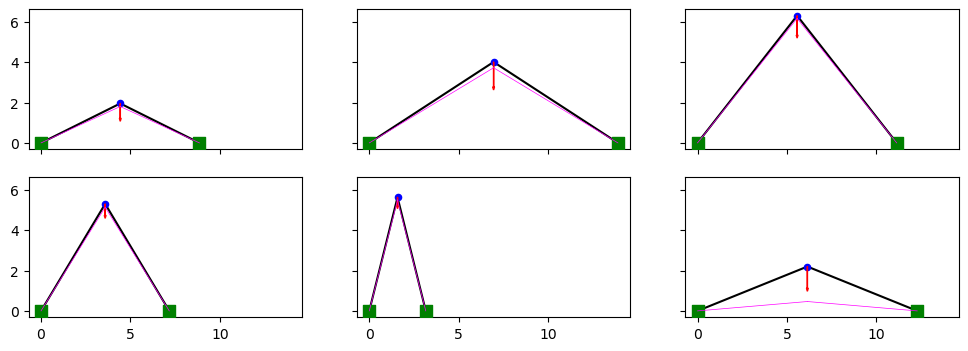

In [19]:
g = TwoBarsTrussGenerator("data/config/triangle_concrete.yaml")

fig, axs = plt.subplots(2, 3, figsize=(12, 4), sharex=True, sharey=True)
for i, r in enumerate(g):
    display_structure(ax=axs[i // 3, i % 3], def_scale=20)
    if i >= 5: break

#g.save("data/dataset/triangle", append=False)

Dataset saved to data/dataset/triangle/data.hdf5


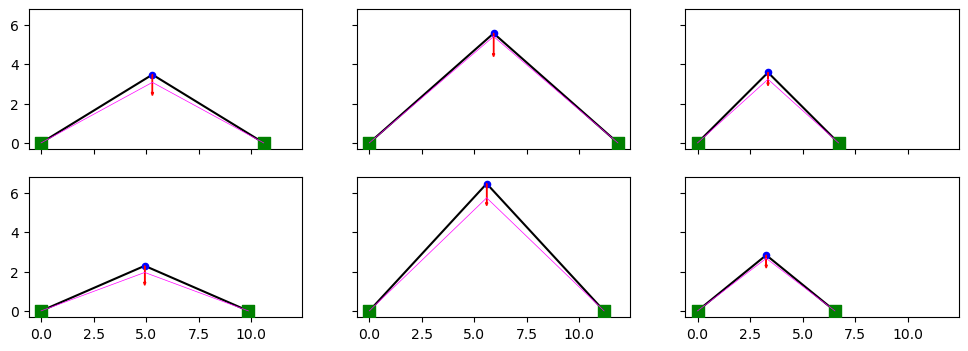

In [12]:
g = TwoBarsTrussGenerator("data/config/triangle_aluminum.yaml")

fig, axs = plt.subplots(2, 3, figsize=(12, 4), sharex=True, sharey=True)
for i, r in enumerate(g):
    display_structure(ax=axs[i // 3, i % 3], def_scale=20)
    if i >= 5: break

g.save("data/dataset/triangle", append=True)

Dataset saved to data/dataset/triangle/data.hdf5


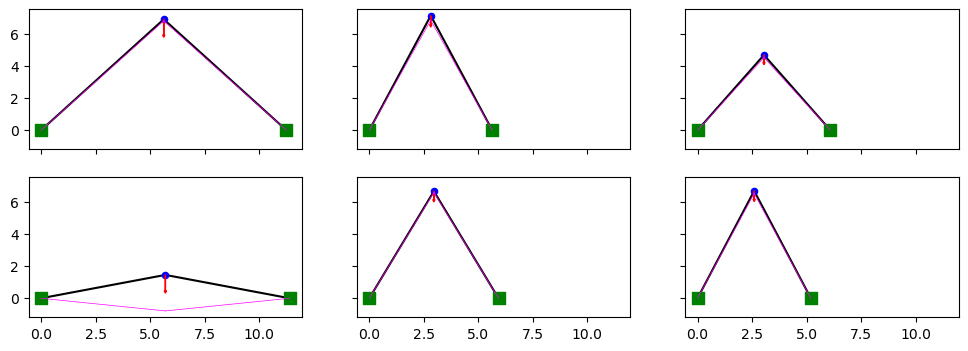

In [13]:
g = TwoBarsTrussGenerator("data/config/triangle_steel.yaml")

fig, axs = plt.subplots(2, 3, figsize=(12, 4), sharex=True, sharey=True)
for i, r in enumerate(g):
    display_structure(ax=axs[i // 3, i % 3], def_scale=20)
    if i >= 5: break

g.save("data/dataset/triangle", append=True)